<a href="https://colab.research.google.com/github/beliaazzhr/Geospatial-COVID19/blob/main/Geospatial_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment Week-10**

Nama   : Anyelir Belia Azzahra

NIM    : 1301200048

In [1]:
!pip3 install geopandas
!pip3 install geoplot

In [2]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

#Gathering Data


In [3]:
covid = pd.read_csv("https://raw.githubusercontent.com/beliaazzhr/Geospatial-COVID19/main/covid_19_indonesia_time_series_all.csv")
covid

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,93,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,92,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,36,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,95,Province,NaN,Sumatera Utara,Indonesia,Asia,Sumatera,UTC+07:00,NaN,25,8.0,450,693.0,5417.0,72981,14874889,203.82,99.051964,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [4]:
maps = gpd.read_file("/content/gadm36_IDN_3.shp")
maps

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.1_1,Arongan Lambalek,None,None,Kecamatan,Sub-district,1107062,None,"POLYGON ((95.97953 4.31063, 95.98042 4.30927, ..."
1,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.2_1,Bubon,None,None,Kecamatan,Sub-district,1107061,None,"POLYGON ((96.16601 4.27803, 96.16323 4.27509, ..."
2,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.3_1,Johan Pahlawan,None,None,Kecamatan,Sub-district,1107050,None,"POLYGON ((96.13205 4.13408, 96.13216 4.13404, ..."
3,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.4_1,Kaway Xvi,None,None,Kecamatan,Sub-district,1107080,None,"POLYGON ((96.16397 4.19111, 96.16402 4.18973, ..."
4,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.5_1,Meureubo,None,None,Kecamatan,Sub-district,1107081,None,"POLYGON ((96.25119 4.12990, 96.24657 4.12608, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,IDN,Indonesia,IDN.33_1,Yogyakarta,None,IDN.33.5_1,Sleman,None,IDN.33.5.13_1,Prambanan,None,None,Kecamatan,Sub-district,3404090,None,"POLYGON ((110.51952 -7.83097, 110.51929 -7.831..."
6692,IDN,Indonesia,IDN.33_1,Yogyakarta,None,IDN.33.5_1,Sleman,None,IDN.33.5.14_1,Seyegan,None,None,Kecamatan,Sub-district,3404030,None,"POLYGON ((110.31304 -7.76178, 110.31292 -7.761..."
6693,IDN,Indonesia,IDN.33_1,Yogyakarta,None,IDN.33.5_1,Sleman,None,IDN.33.5.15_1,Sleman,None,None,Kecamatan,Sub-district,3404130,None,"POLYGON ((110.36657 -7.71932, 110.36652 -7.719..."
6694,IDN,Indonesia,IDN.33_1,Yogyakarta,None,IDN.33.5_1,Sleman,None,IDN.33.5.16_1,Tempel,None,None,Kecamatan,Sub-district,3404140,None,"POLYGON ((110.26794 -7.70727, 110.26834 -7.707..."


In [5]:
covid['Date'] = pd.to_datetime(covid.Date)

temp = covid.copy()
temp.index = temp.Date
temp.drop(['Date'], axis=1, inplace=True)
temp.head()

start_remove = pd.to_datetime('2020-03-01')
end_remove = pd.to_datetime('2021-04-30')

dropThis = pd.date_range(start_remove,end_remove,freq='2h')
temp = temp[~temp.index.isin(dropThis)]
temp

,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-01,ID-AC,Aceh,124,2,118,4,11169,441,9727,1001,Province,NaN,Aceh,Indonesia,Asia,Sumatera,UTC+07:00,Daerah Khusus,18,5.0,289,NaN,6497.0,57956,5247257,90.54,96.910522,4.225615,23.63,2128.54,0.38,84.04,8.40,3.95%,87.09%,1.59,2.00
2021-05-01,ID-BA,Bali,142,10,165,-33,44813,1346,42135,1332,Province,NaN,Bali,Indonesia,Asia,Nusa Tenggara,UTC+08:00,NaN,8,1.0,57,80.0,636.0,5780,4216171,729.43,115.131714,-8.369472,33.68,10628.84,2.37,319.25,31.92,3.00%,94.02%,1.04,1.67
2021-05-01,ID-BT,Banten,53,0,28,25,47396,1210,44202,1984,Province,NaN,Banten,Indonesia,Asia,Jawa,UTC+07:00,NaN,4,4.0,155,313.0,1238.0,9663,10722374,1109.64,106.109004,-6.456736,4.94,4420.29,0.00,112.85,11.28,2.55%,93.26%,0.74,0.00
2021-05-01,ID-BE,Bengkulu,102,0,40,62,6884,172,5885,827,Province,NaN,Bengkulu,Indonesia,Asia,Sumatera,UTC+07:00,NaN,9,1.0,129,172.0,1341.0,19919,1999539,100.38,102.338421,-3.533584,51.01,3442.79,0.00,86.02,8.60,2.50%,85.49%,2.37,1.00
2021-05-01,ID-JK,DKI Jakarta,926,15,793,118,409540,6681,395727,7132,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,85.38,37759.04,1.38,615.98,61.60,1.63%,96.63%,1.17,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,93,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.00
2021-12-02,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,92,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.00
2021-12-02,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,36,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.00


In [6]:
temp.reset_index(inplace=True)
temp = temp[['Date', 'Location', 'Total Active Cases']]

In [7]:
covid = temp.copy()
covid.rename(columns={'Location':'Provinsi'},inplace=True)
covid = covid[covid.Provinsi != "Indonesia"]
covid

,Date,Provinsi,Total Active Cases
0,2021-05-01,Aceh,1001
1,2021-05-01,Bali,1332
2,2021-05-01,Banten,1984
3,2021-05-01,Bengkulu,827
4,2021-05-01,DKI Jakarta,7132
...,...,...,...
7535,2021-12-02,Sulawesi Tenggara,50
7536,2021-12-02,Sulawesi Utara,93
7537,2021-12-02,Sumatera Barat,92
7538,2021-12-02,Sumatera Selatan,36


In [8]:
maps.drop(["NAME_0"],axis=1,inplace=True)
maps.rename(columns = {"NAME_1":"Provinsi"}, inplace = True)
maps['Provinsi'].replace({"Jakarta Raya":"DKI Jakarta"},inplace=True)

#Visualization

In [9]:
# Mengambil data per 1 Mei 2021
start_date = covid["Date"]=="2021-05-01"
start_date.head()

0    True
1    True
2    True
3    True
4    True
Name: Date, dtype: bool

In [10]:
geo = maps.merge(covid[start_date], left_on="Provinsi", right_on="Provinsi")
geo.head()

,GID_0,GID_1,Provinsi,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry,Date,Total Active Cases
0,IDN,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.1_1,Arongan Lambalek,None,None,Kecamatan,Sub-district,1107062,None,"POLYGON ((95.97953 4.31063, 95.98042 4.30927, ...",2021-05-01,1001
1,IDN,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.2_1,Bubon,None,None,Kecamatan,Sub-district,1107061,None,"POLYGON ((96.16601 4.27803, 96.16323 4.27509, ...",2021-05-01,1001
2,IDN,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.3_1,Johan Pahlawan,None,None,Kecamatan,Sub-district,1107050,None,"POLYGON ((96.13205 4.13408, 96.13216 4.13404, ...",2021-05-01,1001
3,IDN,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.4_1,Kaway Xvi,None,None,Kecamatan,Sub-district,1107080,None,"POLYGON ((96.16397 4.19111, 96.16402 4.18973, ...",2021-05-01,1001
4,IDN,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.5_1,Meureubo,None,None,Kecamatan,Sub-district,1107081,None,"POLYGON ((96.25119 4.12990, 96.24657 4.12608, ...",2021-05-01,1001


Text(0.5, 1.0, 'Distribution of COVID19 in Indonesia, May 1st, 2021')

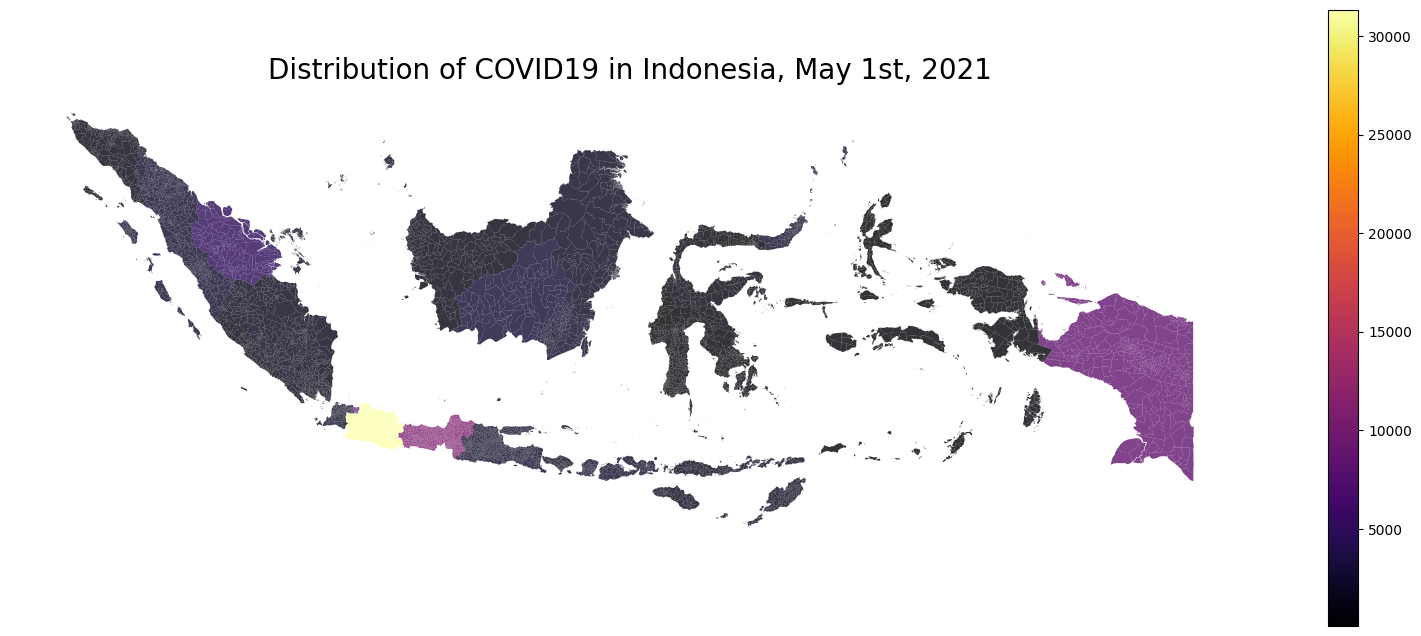

In [11]:
ax = geo.plot(figsize=(20, 8), column='Total Active Cases', cmap='inferno', alpha=0.8, legend = True,)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Distribution of COVID19 in Indonesia, May 1st, 2021", fontsize=20)

In [12]:
sorted = geo.sort_values(by=['Total Active Cases'], ascending=False)
sorted.head()

,GID_0,GID_1,Provinsi,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry,Date,Total Active Cases
957,IDN,IDN.9_1,Jawa Barat,None,IDN.9.5_1,Bogor,None,IDN.9.5.25_1,Leuwisadeng,None,None,Kecamatan,Sub-district,3201021,None,"POLYGON ((106.57922 -6.60850, 106.57801 -6.607...",2021-05-01,31338
1222,IDN,IDN.9_1,Jawa Barat,None,IDN.9.14_1,Kota Bandung,None,IDN.9.14.25_1,Rancasari,None,None,Kecamatan,Sub-district,3273100,None,"POLYGON ((107.66055 -6.96646, 107.66058 -6.966...",2021-05-01,31338
1220,IDN,IDN.9_1,Jawa Barat,None,IDN.9.14_1,Kota Bandung,None,IDN.9.14.23_1,Mandalajati,None,None,Kecamatan,Sub-district,3273142,None,"POLYGON ((107.68684 -6.89661, 107.68684 -6.896...",2021-05-01,31338
1219,IDN,IDN.9_1,Jawa Barat,None,IDN.9.14_1,Kota Bandung,None,IDN.9.14.22_1,Lengkong,None,None,Kecamatan,Sub-district,3273070,None,"POLYGON ((107.62189 -6.94922, 107.62186 -6.949...",2021-05-01,31338
1218,IDN,IDN.9_1,Jawa Barat,None,IDN.9.14_1,Kota Bandung,None,IDN.9.14.21_1,Kiaracondong,None,None,Kecamatan,Sub-district,3273150,None,"POLYGON ((107.64198 -6.94545, 107.64207 -6.943...",2021-05-01,31338


In [13]:
covid_date = covid['Date']
covid_date = covid_date.drop_duplicates()

# Validation

In [14]:
duapuluhmei = covid["Date"]=="2021-05-20"
covidduapuluhmei = maps.merge(covid[duapuluhmei], left_on="Provinsi", right_on="Provinsi")
covidduapuluhmei_sort = covidduapuluhmei.sort_values(by=['Total Active Cases'], ascending=False)
covidduapuluhmei_sort.head()

,GID_0,GID_1,Provinsi,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry,Date,Total Active Cases
1343,IDN,IDN.9_1,Jawa Barat,None,IDN.9.22_1,Purwakarta,None,IDN.9.22.18_1,Wanayasa,None,None,Kecamatan,Sub-district,3214080,None,"POLYGON ((107.57207 -6.73553, 107.57164 -6.735...",2021-05-20,29936
1066,IDN,IDN.9_1,Jawa Barat,None,IDN.9.9_1,Cirebon,None,IDN.9.9.23_1,Mundu,None,None,Kecamatan,Sub-district,3209090,None,"MULTIPOLYGON (((108.63081 -6.77179, 108.63161 ...",2021-05-20,29936
1073,IDN,IDN.9_1,Jawa Barat,None,IDN.9.9_1,Cirebon,None,IDN.9.9.30_1,Plered,None,None,Kecamatan,Sub-district,3209151,None,"POLYGON ((108.51760 -6.68616, 108.51729 -6.686...",2021-05-20,29936
1072,IDN,IDN.9_1,Jawa Barat,None,IDN.9.9_1,Cirebon,None,IDN.9.9.29_1,Pasaleman,None,None,Kecamatan,Sub-district,3209011,None,"POLYGON ((108.72033 -6.99556, 108.71949 -6.995...",2021-05-20,29936
1071,IDN,IDN.9_1,Jawa Barat,None,IDN.9.9_1,Cirebon,None,IDN.9.9.28_1,Panguragan,None,None,Kecamatan,Sub-district,3209201,None,"POLYGON ((108.42672 -6.63868, 108.42700 -6.638...",2021-05-20,29936
